In [1]:
import numpy as np
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import sklearn.preprocessing as skpreprocess
from sklearn.linear_model import Ridge as RidgeRegression
from matplotlib import pyplot as plt

In [2]:
'''
Name: Escalante, Tomas

Collaborators: 

Collaboration details: 

Summary:

Please describe what you did for this assignment, what loss you minimized, and how you minimized the loss function.
In this assignment, I implemented ridge regression.

Report your scores here. For example,

Results for scikit-learn RidgeRegression model with alpha=1.0
Training set mean squared error: 6.3724
Training set r-squared scores: 0.9267
Validation set mean squared error: 9.6293
Validation set r-squared scores: 0.8626
Testing set mean squared error: 19.2863
Testing set r-squared scores: 0.7531
Results for scikit-learn RidgeRegression model with alpha=10.0
Training set mean squared error: 6.9915
Training set r-squared scores: 0.9195
Validation set mean squared error: 10.5660
Validation set r-squared scores: 0.8493
Testing set mean squared error: 18.0993
Testing set r-squared scores: 0.7683
Results for scikit-learn RidgeRegression model with alpha=100.0
Training set mean squared error: 7.8843
Training set r-squared scores: 0.9093
Validation set mean squared error: 11.9197
Validation set r-squared scores: 0.8300
Testing set mean squared error: 18.5883
Testing set r-squared scores: 0.7620
Results for scikit-learn RidgeRegression model with alpha=1000.0
Training set mean squared error: 8.8610
Training set r-squared scores: 0.8980
Validation set mean squared error: 11.7491
Validation set r-squared scores: 0.8324
Testing set mean squared error: 15.2857
Testing set r-squared scores: 0.8043
Results for scikit-learn RidgeRegression model with alpha=10000.0
Training set mean squared error: 10.0741
Training set r-squared scores: 0.8841
Validation set mean squared error: 11.7167
Validation set r-squared scores: 0.8329
Testing set mean squared error: 13.5444
Testing set r-squared scores: 0.8266
Results for scikit-learn RidgeRegression model with alpha=100000.0
Training set mean squared error: 11.4729
Training set r-squared scores: 0.8680
Validation set mean squared error: 12.5270
Validation set r-squared scores: 0.8213
Testing set mean squared error: 10.8895
Testing set r-squared scores: 0.8606
Results for our RidgeRegression model with alpha=1.0
Training Loss: 9868495.370
Data Fidelity Loss: 9868393.209  Regularization Loss: 102.161
Training set mean squared error: 24306.3872
Training set r-squared scores: -278.7429
Validation set mean squared error: 26501.6972
Validation set r-squared scores: -377.0548
Testing set mean squared error: 25515.1970
Testing set r-squared scores: -325.6981
Results for our RidgeRegression model with alpha=10.0
Training Loss: 22917.726
Data Fidelity Loss: 22759.858  Regularization Loss: 157.867
Training set mean squared error: 56.0588
Training set r-squared scores: 0.3548
Validation set mean squared error: 60.9189
Validation set r-squared scores: 0.1310
Testing set mean squared error: 49.7003
Testing set r-squared scores: 0.3636
Results for our RidgeRegression model with alpha=100.0
Training Loss: 3394.678
Data Fidelity Loss: 3225.548  Regularization Loss: 169.130
Training set mean squared error: 7.9447
Training set r-squared scores: 0.9086
Validation set mean squared error: 10.6908
Validation set r-squared scores: 0.8475
Testing set mean squared error: 16.7013
Testing set r-squared scores: 0.7862
Results for our RidgeRegression model with alpha=1000.0
Training Loss: 3828.024
Data Fidelity Loss: 3618.074  Regularization Loss: 209.950
Training set mean squared error: 8.9115
Training set r-squared scores: 0.8974
Validation set mean squared error: 11.2340
Validation set r-squared scores: 0.8397
Testing set mean squared error: 14.5548
Testing set r-squared scores: 0.8136
Results for our RidgeRegression model with alpha=10000.0
Training Loss: 4347.233
Data Fidelity Loss: 4077.059  Regularization Loss: 270.174
Training set mean squared error: 10.0420
Training set r-squared scores: 0.8844
Validation set mean squared error: 11.8907
Validation set r-squared scores: 0.8304
Testing set mean squared error: 13.8502
Testing set r-squared scores: 0.8227
Results for our RidgeRegression model with alpha=100000.0
Training Loss: 5271.383
Data Fidelity Loss: 4708.966  Regularization Loss: 562.418
Training set mean squared error: 11.5984
Training set r-squared scores: 0.8665
Validation set mean squared error: 13.1313
Validation set r-squared scores: 0.8127
Testing set mean squared error: 11.8232
Testing set r-squared scores: 0.8486
'''

'\nName: Escalante, Tomas\n\nCollaborators: Doe, Jane (Please write names in <Last Name, First Name> format)\n\nCollaboration details: Discussed <function name> implementation details with Jane Doe.\n\nSummary:\n\nPlease describe what you did for this assignment, what loss you minimized, and how you minimized the loss function.\n\nReport your scores here. For example,\n\nResults for scikit-learn RidgeRegression model with alpha=1.0\nTraining set mean squared error: 6.3724\nTraining set r-squared scores: 0.9267\nValidation set mean squared error: 9.6293\nValidation set r-squared scores: 0.8626\nTesting set mean squared error: 19.2863\nTesting set r-squared scores: 0.7531\nResults for scikit-learn RidgeRegression model with alpha=10.0\nTraining set mean squared error: 6.9915\nTraining set r-squared scores: 0.9195\nValidation set mean squared error: 10.5660\nValidation set r-squared scores: 0.8493\nTesting set mean squared error: 18.0993\nTesting set r-squared scores: 0.7683\nResults for 

In [26]:
'''
Implementation of ridge regression
'''
class RidgeRegressionClosedForm(object):

    def __init__(self):

        # Define private variables
        self.__weights = None

    def fit(self, z, y, alpha):
        '''
        Fits the model to x and y using closed form solution

        Args:
            z : numpy
                d x N feature vector
            y : numpy
                1 x N ground-truth label
            alpha : float
                weight (lambda) of regularization term
        '''

        # TODO: Implement the fit function
        # The normal equation w* = (Z.T * Z + alpha * I)^-1 * Z.T * y 
        # z.T (d,N) * z (N,d) gives dimensions (d,d)
        zTz = np.matmul(z.T, z)
        eye = np.eye(zTz.shape[0])
        # the inverse of this is still (d,d)
        zTz_plus_alpha_eye = np.linalg.inv(zTz + alpha * eye)
        # now multiply this (d,d) by z.T (d,N) and this gives dimensions (d,N)
        var = np.matmul(zTz_plus_alpha_eye, z.T)
        # finally, our weights will be given by multiplying this (d,N) by 
        # the input y (1,N)     
        self.__weights = np.matmul(var.T, y)

        # TODO: Compute loss
    
        # l = (1 / N) * ((Z * w - y).T * (Z * w - y) + alpha * w.T * w)
        loss_data_fidelity = np.matmul((np.matmul(self.__weights, z) - y).T, (np.matmul(self.__weights, z) - y))
        loss_data_fidelity = np.mean(loss_data_fidelity)
        # l = L2(Z * w - y)^2 + alpha * L2(w)
        loss_regularization = alpha * np.matmul(self.__weights.T, self.__weights)
        loss_regularization = np.mean(loss_regularization)
        loss = loss_data_fidelity + loss_regularization

        print('Training Loss: {:.3f}'.format(loss))
        print('Data Fidelity Loss: {:.3f}  Regularization Loss: {:.3f}'.format(
            loss_data_fidelity, loss_regularization))

    def predict(self, z):
        '''
        Predicts the label for each feature vector x

        Args:
            z : numpy
                d x N feature vector

        Returns:
            numpy : d x 1 label vector
        '''

        # TODO: Implement the predict function
        predictions = np.matmul(self.__weights.T, z)

        return predictions

    def __score_r_squared(self, y_hat, y):
        '''
        Measures the r-squared score from groundtruth y

        Args:
            y_hat : numpy
                1 x N predictions
            y : numpy
                1 x N ground-truth label

        Returns:
            float : r-squared score
        '''

        # TODO: Implement the __score_r_squared function
        # Explained variation, u: sum((y_hat - y)^2)
        sum_squared_errors = np.sum((y_hat - y)**2)
        
        # Total variation, v: sum((y - y_mean)^2)
        sum_variance = np.sum((y - np.mean(y))**2)
        
        # R^2 = 1 - (u/v)
        return 1.0 - sum_squared_errors/sum_variance

    def __score_mean_squared_error(self, y_hat, y):
        '''
        Measures the mean squared error (distance) from groundtruth y

        Args:
            y_hat : numpy
                1 x N predictions
            y : numpy
                1 x N ground-truth label

        Returns:
            float : mean squared error (mse)
        '''

        # TODO: Implement the __score_mean_squared_error function
        # mean((y_hat - y)^2)
        return np.mean((y_hat - y)**2)

    def score(self, x, y, scoring_func='r_squared'):
        '''
        Predicts real values from x and measures the mean squared error (distance)
        or r-squared from groundtruth y

        Args:
            x : numpy
                d x N feature vector
            y : numpy
                1 x N ground-truth label
            scoring_func : str
                scoring function: r_squared, mean_squared_error

        Returns:
            float : mean squared error (mse)
        '''

        # TODO: Implement the score function

        predictions = self.predict(x)
        
        if scoring_func == 'r_squared':
            return self.__score_r_squared(predictions, y)
        elif scoring_func == 'mean_squared_error':
            return self. __score_mean_squared_error(predictions, y)
        else:
            raise ValueError('Encountered unsupported scoring_func: {}'.format(scoring_func))

In [27]:
'''
Utility functions to compute error and plot
'''
def score_mean_squared_error(model, x, y):
    '''
    Scores the model on mean squared error metric

    Args:
        model : object
            trained model, assumes predict function returns N x d predictions
        x : numpy
            N x d numpy array of features
        y : numpy
            N x 1 groundtruth vector
    Returns:
        float : mean squared error
    '''

    # Implement the score mean squared error function
    predictions = model.predict(x)
    mse = skmetrics.mean_squared_error(predictions, y)
    return mse

def plot_results(axis,
                 x_values,
                 y_values,
                 labels,
                 colors,
                 x_limits,
                 y_limits,
                 x_label,
                 y_label):
    '''
    Plots x and y values using line plot with labels and colors

    Args:
        axis :  pyplot.ax
            matplotlib subplot axis
        x_values : list[numpy]
            list of numpy array of x values
        y_values : list[numpy]
            list of numpy array of y values
        labels : str
            list of names for legend
        colors : str
            colors for each line
        x_limits : list[float]
            min and max values of x axis
        y_limits : list[float]
            min and max values of y axis
        x_label : list[float]
            name of x axis
        y_label : list[float]
            name of y axis
    '''

    # Iterate through x_values, y_values, labels, and colors and plot them
    # with associated legend
    for x, y, label, color in zip(x_values, y_values, labels, colors):
        axis.plot(x, y, marker='o', color=color, label=label)
        axis.legend(loc='best')

    # Set x and y limits
    axis.set_xlim(x_limits)
    axis.set_ylim(y_limits)

    # Set x and y labels
    axis.set_xlabel(x_label)
    axis.set_ylabel(y_label)

Results for scikit-learn RidgeRegression model with alpha=1.0
Training set mean squared error: 6.3724
Training set r-squared scores: 0.9267
Validation set mean squared error: 9.6293
Validation set r-squared scores: 0.8626
Testing set mean squared error: 19.2863
Testing set r-squared scores: 0.7531
Results for scikit-learn RidgeRegression model with alpha=10.0
Training set mean squared error: 6.9915
Training set r-squared scores: 0.9195
Validation set mean squared error: 10.5660
Validation set r-squared scores: 0.8493
Testing set mean squared error: 18.0993
Testing set r-squared scores: 0.7683
Results for scikit-learn RidgeRegression model with alpha=100.0
Training set mean squared error: 7.8843
Training set r-squared scores: 0.9093
Validation set mean squared error: 11.9197
Validation set r-squared scores: 0.8300
Testing set mean squared error: 18.5883
Testing set r-squared scores: 0.7620
Results for scikit-learn RidgeRegression model with alpha=1000.0
Training set mean squared error: 

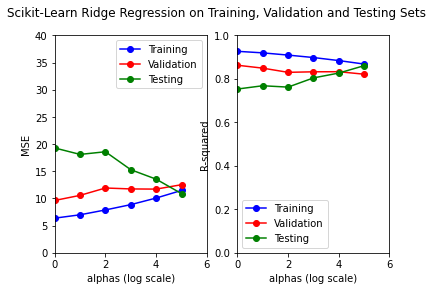

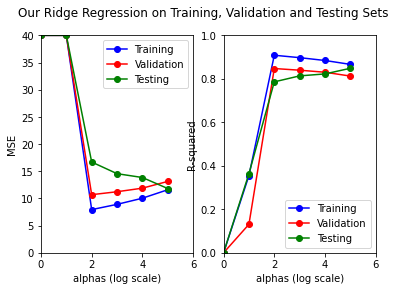

In [28]:
if __name__ == '__main__':

    boston_housing_data = skdata.load_boston()
    x = boston_housing_data.data
    y = boston_housing_data.target

    # 80 percent train, 10 percent validation, 10 percent test split
    train_idx = []
    val_idx = []
    test_idx = []
    for idx in range(x.shape[0]):
        if idx and idx % 10 == 9:
            val_idx.append(idx)
        elif idx and idx % 10 == 0:
            test_idx.append(idx)
        else:
            train_idx.append(idx)

    x_train, x_val, x_test = x[train_idx, :], x[val_idx, :], x[test_idx, :]
    y_train, y_val, y_test = y[train_idx], y[val_idx], y[test_idx]

    '''
    Trains and tests Ridge regression model from scikit-learn
    '''
    # Initialize polynomial expansion of degree 2
    poly_transform = skpreprocess.PolynomialFeatures(degree=2)

    # Compute the polynomial terms needed for the data
    poly_transform.fit(x_train)

    # Transform the data by nonlinear mapping
    x_poly_train = poly_transform.transform(x_train)
    x_poly_val = poly_transform.transform(x_val)
    x_poly_test = poly_transform.transform(x_test)

    # Initialize empty lists to store scores for MSE and R-squared
    scores_mse_ridge_scikit_train = []
    scores_r2_ridge_scikit_train = []
    scores_mse_ridge_scikit_val = []
    scores_r2_ridge_scikit_val = []
    scores_mse_ridge_scikit_test = []
    scores_r2_ridge_scikit_test = []

    alphas = [1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]

    for alpha in alphas:

        # Initialize scikit-learn ridge regression model
        model_ridge_scikit = RidgeRegression(alpha=alpha)

        # Trains scikit-learn ridge regression model
        model_ridge_scikit.fit(x_poly_train, y_train)

        print('Results for scikit-learn RidgeRegression model with alpha={}'.format(alpha))

        # Test model on training set
        score_mse_ridge_scikit_train = score_mean_squared_error(model_ridge_scikit, x_poly_train, y_train)
        print('Training set mean squared error: {:.4f}'.format(score_mse_ridge_scikit_train))

        score_r2_ridge_scikit_train = model_ridge_scikit.score(x_poly_train, y_train)
        print('Training set r-squared scores: {:.4f}'.format(score_r2_ridge_scikit_train))

        # Save MSE and R-squared training scores
        scores_mse_ridge_scikit_train.append(score_mse_ridge_scikit_train)
        scores_r2_ridge_scikit_train.append(score_r2_ridge_scikit_train)

        # Test model on validation set
        score_mse_ridge_scikit_val = score_mean_squared_error(model_ridge_scikit, x_poly_val, y_val)
        print('Validation set mean squared error: {:.4f}'.format(score_mse_ridge_scikit_val))

        score_r2_ridge_scikit_val = model_ridge_scikit.score(x_poly_val, y_val)
        print('Validation set r-squared scores: {:.4f}'.format(score_r2_ridge_scikit_val))

        # Save MSE and R-squared validation scores
        scores_mse_ridge_scikit_val.append(score_mse_ridge_scikit_val)
        scores_r2_ridge_scikit_val.append(score_r2_ridge_scikit_val)

        # Test model on testing set
        score_mse_ridge_scikit_test = score_mean_squared_error(model_ridge_scikit, x_poly_test, y_test)
        print('Testing set mean squared error: {:.4f}'.format(score_mse_ridge_scikit_test))

        score_r2_ridge_scikit_test = model_ridge_scikit.score(x_poly_test, y_test)
        print('Testing set r-squared scores: {:.4f}'.format(score_r2_ridge_scikit_test))

        # Save MSE and R-squared testing scores
        scores_mse_ridge_scikit_test.append(score_mse_ridge_scikit_test)
        scores_r2_ridge_scikit_test.append(score_r2_ridge_scikit_test)

    # Convert each scores to NumPy arrays
    scores_mse_ridge_scikit_train = np.array(scores_mse_ridge_scikit_train)
    scores_mse_ridge_scikit_val = np.array(scores_mse_ridge_scikit_val)
    scores_mse_ridge_scikit_test = np.array(scores_mse_ridge_scikit_test)
    scores_r2_ridge_scikit_train = np.array(scores_r2_ridge_scikit_train)
    scores_r2_ridge_scikit_val = np.array(scores_r2_ridge_scikit_val)
    scores_r2_ridge_scikit_test = np.array(scores_r2_ridge_scikit_test)

    # Clip each set of MSE scores between 0 and 40
    scores_mse_ridge_scikit_train = np.clip(scores_mse_ridge_scikit_train, 0.0, 40.0)
    scores_mse_ridge_scikit_val = np.clip(scores_mse_ridge_scikit_val, 0.0, 40.0)
    scores_mse_ridge_scikit_test = np.clip(scores_mse_ridge_scikit_test, 0.0, 40.0)

    # Clip each set of R-squared scores between 0 and 1
    scores_r2_ridge_scikit_train = np.clip(scores_r2_ridge_scikit_train, 0.0, 1.0)
    scores_r2_ridge_scikit_val = np.clip(scores_r2_ridge_scikit_val, 0.0, 1.0)
    scores_r2_ridge_scikit_test = np.clip(scores_r2_ridge_scikit_test, 0.0, 1.0)

    # Create figure for training, validation and testing scores for different features
    n_experiments = scores_mse_ridge_scikit_train.shape[0]
    fig = plt.figure()

    labels = ['Training', 'Validation', 'Testing']
    colors = ['blue', 'red', 'green']

    # Create the first subplot of a 1 by 2 figure to plot MSE for training, validation, testing
    ax = fig.add_subplot(1, 2, 1)

    # TODO: Set x (alpha in log scale) and y values (MSE)
    x_values = [np.log10(alphas)] * n_experiments
    y_values = [scores_mse_ridge_scikit_train, scores_mse_ridge_scikit_val, scores_mse_ridge_scikit_test]

    # TODO: Plot MSE scores for training, validation, testing sets
    # Set x limits to 0 to max of x_values + 1 and y limits between 0 and 40
    # Set x label to 'alpha (log scale)' and y label to 'MSE',
    plot_results(axis = ax,
                 x_values = x_values,
                 y_values = y_values,
                 labels = labels,
                 colors = colors,
                 x_limits = [0.0, np.log10(alphas[-1]) + 1],
                 y_limits = [0.0, 40.0],
                 x_label = 'alphas (log scale)',
                 y_label = 'MSE')

    # Create the second subplot of a 1 by 2 figure to plot R-squared for training, validation, testing
    ax = fig.add_subplot(1, 2, 2)

    # TODO: Set x (alpha in log scale) and y values (R-squared)
    x_values = [np.log10(alphas)] * n_experiments
    y_values = [scores_r2_ridge_scikit_train, scores_r2_ridge_scikit_val, scores_r2_ridge_scikit_test]

    # TODO: Plot R-squared scores for training, validation, testing sets
    # Set x limits to 0 to max of x_values + 1 and y limits between 0 and 1
    # Set x label to 'alpha (log scale)' and y label to 'R-squared',
    plot_results(axis = ax,
                 x_values = x_values,
                 y_values = y_values,
                 labels = labels,
                 colors = colors,
                 x_limits = [0.0, np.log10(alphas[-1]) + 1],
                 y_limits = [0.0, 1.0],
                 x_label = 'alphas (log scale)',
                 y_label = 'R-squared')

    # TODO: Create super title 'Scikit-Learn Ridge Regression on Training, Validation and Testing Sets'
    plt.suptitle('Scikit-Learn Ridge Regression on Training, Validation and Testing Sets')

    '''
    Trains and tests our ridge regression model using different alphas
    '''

    # Initialize empty lists to store scores for MSE and R-squared
    scores_mse_ridge_ours_train = []
    scores_r2_ridge_ours_train = []
    scores_mse_ridge_ours_val = []
    scores_r2_ridge_ours_val = []
    scores_mse_ridge_ours_test = []
    scores_r2_ridge_ours_test = []

    # TODO: convert dataset (N x d) to correct shape (d x N)
    x_train = x_poly_train.T
    x_val = x_poly_val.T
    x_test = x_poly_test.T

    # For each alpha, train a ridge regression model on degree 2 polynomial features
    for alpha in alphas:

        # TODO: Initialize our own ridge regression model
        model_ridge_ours = RidgeRegressionClosedForm()

        print('Results for our RidgeRegression model with alpha={}'.format(alpha))

        # TODO: Train model on training set
        model_ridge_ours.fit(x_train, y_train, alpha)

        # TODO: Test model on training set using mean squared error and r-squared
        score_mse_ridge_ours_train = model_ridge_ours.score(x_train, y_train, scoring_func='mean_squared_error')
        print('Training set mean squared error: {:.4f}'.format(score_mse_ridge_ours_train))

        score_r2_ridge_ours_train = model_ridge_ours.score(x_train, y_train, scoring_func='r_squared')
        print('Training set r-squared scores: {:.4f}'.format(score_r2_ridge_ours_train))

        # TODO: Save MSE and R-squared training scores
        scores_mse_ridge_ours_train.append(score_mse_ridge_ours_train)
        scores_r2_ridge_ours_train.append(score_r2_ridge_ours_train)

        # TODO: Test model on validation set using mean squared error and r-squared
        score_mse_ridge_ours_val = model_ridge_ours.score(x_val, y_val, scoring_func='mean_squared_error')
        print('Validation set mean squared error: {:.4f}'.format(score_mse_ridge_ours_val))

        score_r2_ridge_ours_val = model_ridge_ours.score(x_val, y_val, scoring_func='r_squared')
        print('Validation set r-squared scores: {:.4f}'.format(score_r2_ridge_ours_val))

        # TODO: Save MSE and R-squared validation scores
        scores_mse_ridge_ours_val.append(score_mse_ridge_ours_val)
        scores_r2_ridge_ours_val.append(score_r2_ridge_ours_val)

        # TODO: Test model on testing set using mean squared error and r-squared
        score_mse_ridge_ours_test = model_ridge_ours.score(x_test, y_test, scoring_func='mean_squared_error')
        print('Testing set mean squared error: {:.4f}'.format(score_mse_ridge_ours_test))

        score_r2_ridge_ours_test = model_ridge_ours.score(x_test, y_test, scoring_func='r_squared')
        print('Testing set r-squared scores: {:.4f}'.format(score_r2_ridge_ours_test))

        # TODO: Save MSE and R-squared testing scores
        scores_mse_ridge_ours_test.append(score_mse_ridge_ours_test)
        scores_r2_ridge_ours_test.append(score_r2_ridge_ours_test)

    # Convert each scores to NumPy arrays
    scores_mse_ridge_ours_train = np.array(scores_mse_ridge_ours_train)
    scores_mse_ridge_ours_val = np.array(scores_mse_ridge_ours_val)
    scores_mse_ridge_ours_test = np.array(scores_mse_ridge_ours_test)
    scores_r2_ridge_ours_train = np.array(scores_r2_ridge_ours_train)
    scores_r2_ridge_ours_val = np.array(scores_r2_ridge_ours_val)
    scores_r2_ridge_ours_test = np.array(scores_r2_ridge_ours_test)

    # TODO: Clip each set of MSE scores between 0 and 40
    scores_mse_ridge_ours_train = np.clip(scores_mse_ridge_ours_train, 0.0, 40.0)
    scores_mse_ridge_ours_val = np.clip(scores_mse_ridge_ours_val, 0.0, 40.0)
    scores_mse_ridge_ours_test = np.clip(scores_mse_ridge_ours_test, 0.0, 40.0)

    # TODO: Clip each set of R-squared scores between 0 and 1
    scores_r2_ridge_ours_train = np.clip(scores_r2_ridge_ours_train, 0.0, 1.0)
    scores_r2_ridge_ours_val = np.clip(scores_r2_ridge_ours_val, 0.0, 1.0)
    scores_r2_ridge_ours_test = np.clip(scores_r2_ridge_ours_test, 0.0, 1.0)

    # Create figure for training, validation and testing scores for different features
    n_experiments = scores_mse_ridge_ours_train.shape[0]
    fig = plt.figure()

    labels = ['Training', 'Validation', 'Testing']
    colors = ['blue', 'red', 'green']

    # Create the first subplot of a 1 by 2 figure to plot MSE for training, validation, testing
    ax = fig.add_subplot(1, 2, 1)

    # TODO: Set x (alpha in log scale) and y values (MSE)
    x_values = [np.log10(alphas)] * n_experiments
    y_values = [scores_mse_ridge_ours_train, scores_mse_ridge_ours_val, scores_mse_ridge_ours_test]

    # TODO: Plot MSE scores for training, validation, testing sets
    # Set x limits to 0 to max of x_values + 1 and y limits between 0 and 40
    # Set x label to 'alpha (log scale)' and y label to 'MSE',
    plot_results(axis = ax,
                 x_values = x_values,
                 y_values = y_values,
                 labels = labels,
                 colors = colors,
                 x_limits = [0.0, np.log10(alphas[-1]) + 1],
                 y_limits = [0.0, 40.0],
                 x_label = 'alphas (log scale)',
                 y_label = 'MSE')

    # Create the second subplot of a 1 by 2 figure to plot R-squared for training, validation, testing
    ax = fig.add_subplot(1, 2, 2)

    # TODO: Set x (alpha in log scale) and y values (R-squared)
    x_values = [np.log10(alphas)] * n_experiments
    y_values = [scores_r2_ridge_ours_train, scores_r2_ridge_ours_val, scores_r2_ridge_ours_test]

    # TODO: Plot R-squared scores for training, validation, testing sets
    # Set x limits to 0 to max of x_values + 1 and y limits between 0 and 1
    # Set x label to 'alpha (log scale)' and y label to 'R-squared',
    plot_results(axis = ax,
                 x_values = x_values,
                 y_values = y_values,
                 labels = labels,
                 colors = colors,
                 x_limits = [0.0, np.log10(alphas[-1]) + 1],
                 y_limits = [0.0, 1.0],
                 x_label = 'alphas (log scale)',
                 y_label = 'R-squared')

    # TODO: Create super title 'Our Ridge Regression on Training, Validation and Testing Sets'
    plt.suptitle('Our Ridge Regression on Training, Validation and Testing Sets')

    plt.show()